## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sb
import os
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/Professional/Udacity/Capstone/

/content/drive/MyDrive/Professional/Udacity/Capstone


In [4]:
ls

 201902-fordgobike-tripdata.csv                  oak_png.PNG
 bay_area.png                                    sf_png.PNG
 Communicate_Data                                sj_png.PNG
'Communicate Data Capstone Slide Deck.gslides'


## Importing and Cleaning Data

In [5]:
# Importing CSV file
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# Create a copy to clean
df_clean = df.copy()

In [8]:
# Drop null columns
df_clean.dropna(inplace=True)

In [9]:
# Changing to correct data types
df_clean = df_clean.astype({"start_station_id": int, "end_station_id": int, "bike_id": int})
df_clean = df_clean.astype({"member_birth_year": int})
df_clean.start_time = pd.to_datetime(df_clean.start_time, format='%Y-%m-%d %H:%M:%S')
df_clean.end_time = pd.to_datetime(df_clean.end_time, format='%Y-%m-%d %H:%M:%S')

In [10]:
# No duplicates
sum(df_clean.duplicated())

0

## Exploratory Data Analysis

### Starting Stations

Which stations are the busiest stations?  

In [11]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [13]:
# Grouping by start_station_id and creating a new dataframe
df_test = df_clean.groupby("start_station_id").mean().sort_values(by="start_station_id").reset_index()

In [14]:
df_test

,start_station_id,duration_sec,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
0,3,855.046183,37.786375,-122.404904,93.983206,37.779635,-122.406828,4656.118321,1985.307252
1,4,958.767568,37.785881,-122.408915,104.324324,37.780162,-122.407762,4837.493694,1983.491892
2,5,827.316231,37.783899,-122.408445,106.353545,37.777340,-122.409642,4619.324627,1984.952892
3,6,915.508354,37.804770,-122.403234,64.622278,37.788209,-122.399800,4887.746835,1983.709367
4,7,632.424280,37.804562,-122.271738,201.856070,37.810727,-122.267035,4329.561952,1982.998748
...,...,...,...,...,...,...,...,...,...
324,385,646.489855,37.850578,-122.278175,222.686957,37.849190,-122.273905,4024.098551,1984.173913
325,386,720.313084,37.752105,-122.419724,139.411215,37.761648,-122.416145,4733.598131,1984.719626
326,388,1319.529412,37.352887,-121.886050,313.529412,37.339426,-121.887033,4633.058824,1987.588235
327,389,1117.153846,37.353062,-121.891937,317.076923,37.338285,-121.891796,4803.076923,1978.846154


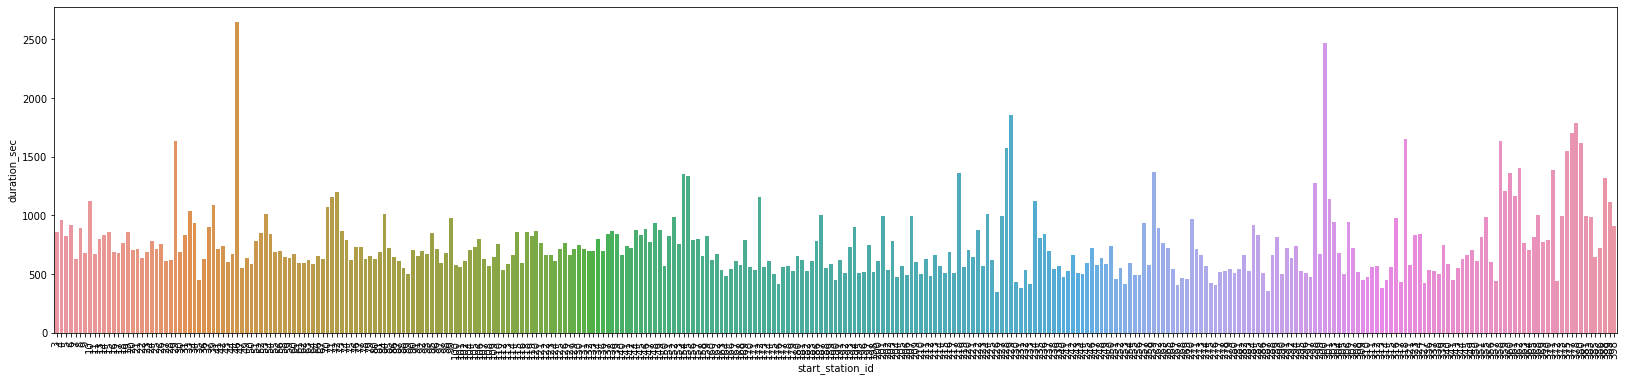

In [15]:
plt.figure(figsize = [28,6])
sb.barplot(data=df_test, x='start_station_id', y='duration_sec');
plt.xticks(rotation=90);

This question is too high level.  Not much to do with this data.  Will use deeper questions to find more specific results.

### Station Difference Frequency

Which stations have the highest start trip and lowest end trip and vice versa?  This would be interesting to know which stations may have a surplus of bikes over time while other stations may have a deficit of bikes.

In [16]:
# Creating a new dataframe that subtracts the count of each end_station_id from count of start_station_id
df_station_start_freq = df_clean.start_station_id.value_counts().reset_index()
df_station_start_freq.columns=['start_station_id', 'start_count']

df_station_end_freq = df_clean.end_station_id.value_counts().reset_index()
df_station_end_freq.columns=['end_station_id', 'end_count']

df_station_freq = df_station_start_freq.join(df_station_end_freq.set_index('end_station_id'), on='start_station_id')
df_station_freq = df_station_freq.rename(columns={'start_station_id': 'station_id'})
df_station_freq['difference'] = df_station_freq.start_count - df_station_freq.end_count

In [17]:
# Verify dataframe was created correctly
df_station_freq.head()

,station_id,start_count,end_count,difference
0,58,3649,3709,-60
1,67,3408,4624,-1216
2,81,2952,2782,170
3,21,2711,3461,-750
4,3,2620,2854,-234


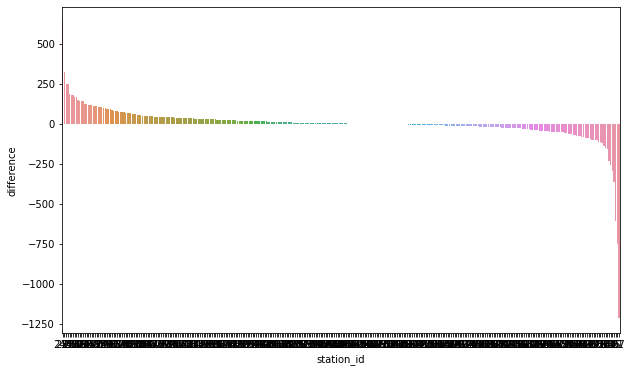

In [18]:
# Plot all the data
plt.figure(figsize=[10,6])
sb.barplot(data=df_station_freq, x='station_id', y='difference', order=df_station_freq.sort_values('difference', ascending=False).station_id);

This chart shows that there are certain stations where people take out more bikes than bikes are returned to and vice versa.  Will isolate the extremes (top 5 and bottom 5)

In [19]:
# We are only concerned with the top 5 and bottom 5 differences
df_station_freq_top5 = df_station_freq.sort_values('difference', ascending=False)[0:5]
df_station_freq_bot5 = df_station_freq.sort_values('difference', ascending=False)[-5:]
df_station_freq_bot5.difference = df_station_freq_bot5.difference * -1
df_station_freq_bot5

,station_id,start_count,end_count,difference
5,30,2577,2870,293
10,6,1975,2341,366
6,15,2541,3151,610
3,21,2711,3461,750
1,67,3408,4624,1216


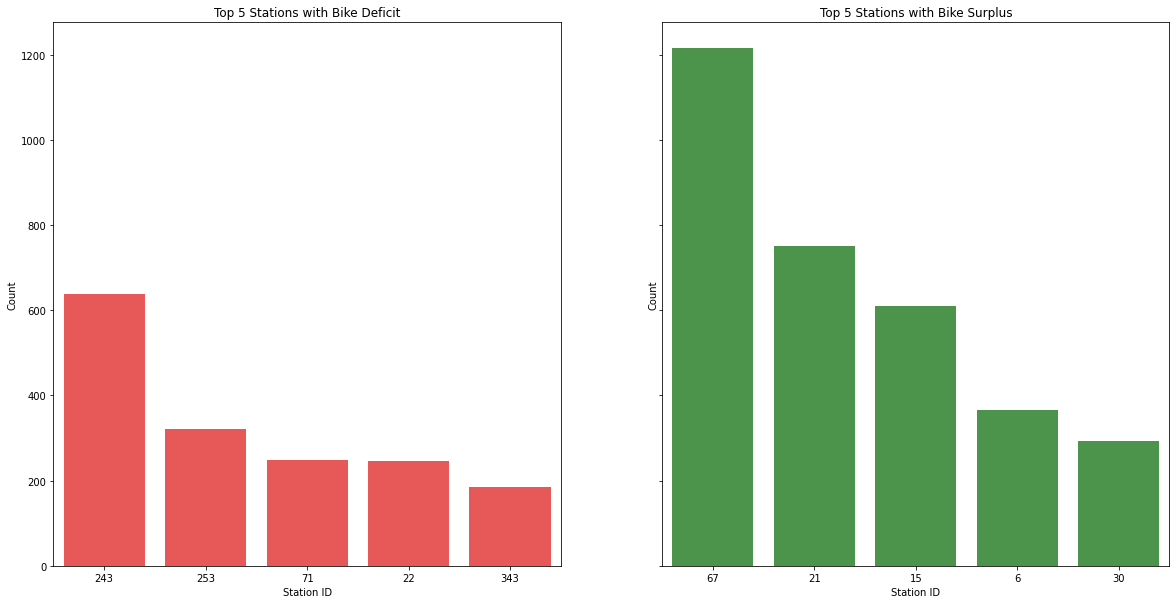

In [20]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(20,10))

# Plot top 5 stations with bike deficit (start > end)
sb.barplot(data=df_station_freq_top5, ax=axes[0], x='station_id', y='difference', color="red", alpha=.75, order=df_station_freq_top5.sort_values('difference',ascending=False).station_id);
axes[0].set_title('Top 5 Stations with Bike Deficit')
axes[0].set(xlabel='Station ID', ylabel='Count')

# Plot top 5 stations with bike surplus (end > start)
sb.barplot(data=df_station_freq_bot5, ax=axes[1], x='station_id', y='difference', color="green", alpha=.75, order=df_station_freq_bot5.sort_values('difference',ascending=False).station_id);
axes[1].set_title('Top 5 Stations with Bike Surplus')
axes[1].set(xlabel='Station ID', ylabel='Count')

plt.show()

### Frequency per date/time

Is there a time during the day our bikes are being used the most?  Is there a day of the week our bikes are being used the most?

In [21]:
# Create new columns for hour of day and weekday
df_clean["hour"]= df_clean.start_time.dt.hour
df_clean['weekday'] = df_clean.start_time.dt.weekday + 1

In [22]:
# Counting occurence of a trip during specific time (hour and weekday)
df_hour = df_clean.hour.value_counts().reset_index()
df_hour.columns=['hour', 'hour_count']
df_weekday = df_clean.weekday.value_counts().reset_index()
df_weekday.columns=['weekday', 'weekday_count']

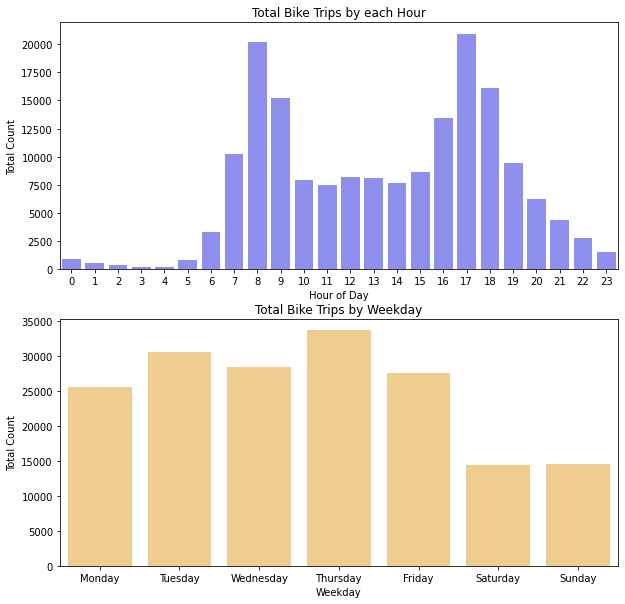

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sb.barplot(data=df_hour, ax=axes[0], x='hour', y='hour_count', color='blue', alpha=0.5, order=df_hour.sort_values('hour').hour);
axes[0].set_title('Total Bike Trips by each Hour')
axes[0].set(xlabel='Hour of Day', ylabel='Total Count')

sb.barplot(data=df_weekday, ax=axes[1], x='weekday', y='weekday_count', color='orange', alpha=0.5, order=df_weekday.sort_values('weekday').weekday);
axes[1].set_title('Total Bike Trips by Weekday')
axes[1].set(xlabel='Weekday', ylabel='Total Count')
axes[1].set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.show()

### Demographic

Which is the most popular demographic for our bike service?

In [24]:
# Check member birth years
df_member_year = df_clean.member_birth_year.unique()
df_member_year.sort()
df_member_year

array([1878, 1900, 1901, 1902, 1910, 1920, 1927, 1928, 1930, 1931, 1933,
       1934, 1938, 1939, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001])

In [25]:
# Drop data where member birth year is less tahn 1940 (dropping everyone who is older than 79 as data is either user error or insignificant)
df_demo = df_clean[df.member_birth_year > 1940].reset_index(drop=True)

# Create dataframe and pivot for bivariate data
df_demo = df_demo.groupby(['member_birth_year', 'member_gender']).size()
df_demo = df_demo.reset_index(name='count')
df_demo = df_demo.pivot(index='member_gender', columns='member_birth_year', values='count')
df_demo.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


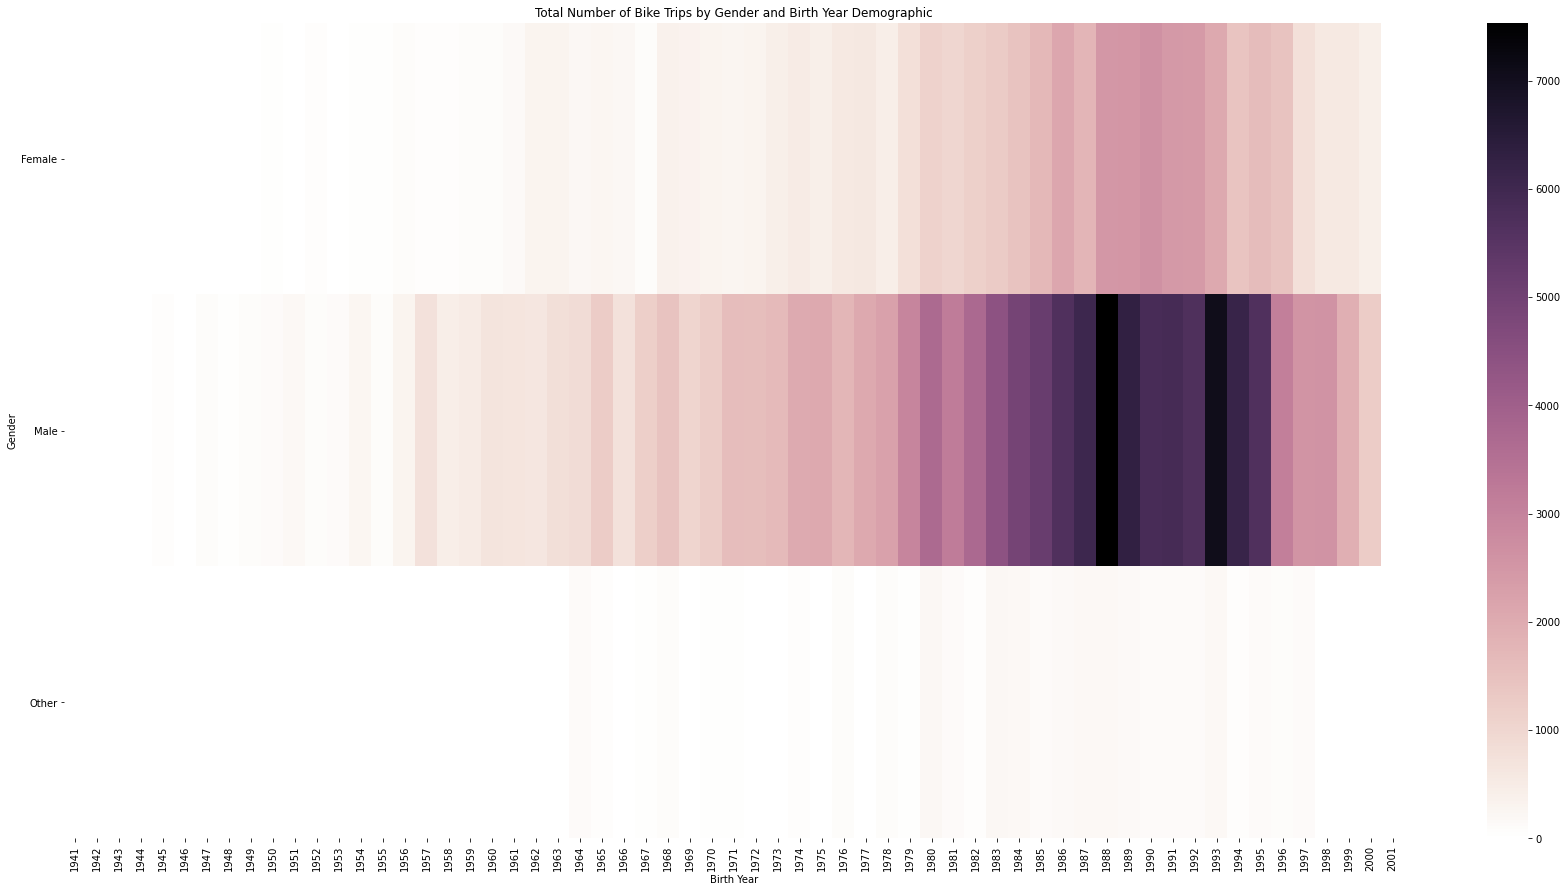

In [26]:
plt.figure(figsize = (30,15))

cmap = sb.cubehelix_palette(dark=0, light=1, as_cmap=True)
sb.heatmap(df_demo, cmap=cmap)
plt.title('Total Number of Bike Trips by Gender and Birth Year Demographic')
plt.xlabel('Birth Year')
plt.ylabel('Gender')
plt.yticks(rotation = 0)

plt.show()

### Geolocation

Which geographical areas have the highest usage of our bike service?

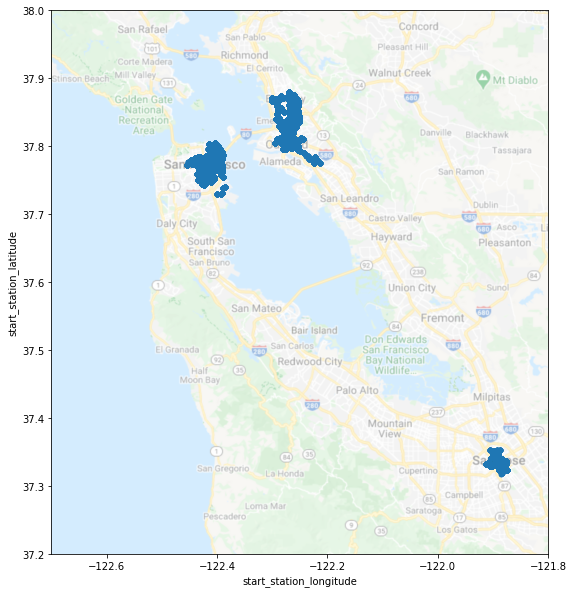

In [27]:
# Find geographical locations and plotting overlay on google maps
bay_img = mpimg.imread('bay_area.png')

ax = df_clean.plot(kind="scatter", x='start_station_longitude', y='start_station_latitude', figsize=(8.9,10))
ax.imshow(bay_img, extent=[-122.7, -121.8, 37.2, 38.0], alpha=0.5, aspect='auto')

plt.show()

Interesting to see that we have 3 groups of data corresponding to 3 cities: San Francisco, Oakland and San Jose

In [28]:
# Creating separate df for each of the 3 clustered locations (cities: San Francisco, Oaklan, San Jose)
df_sf = df_clean[df.start_station_longitude < -122.32].reset_index(drop=True)

df_oak = df_clean[df.start_station_longitude >= -122.32]
df_oak = df_oak[df.start_station_longitude < -122].reset_index(drop=True)

df_sj = df_clean[df.start_station_longitude >= -122].reset_index(drop=True)

# Verifying all data points are allocated to a dataframe
df_sf.shape[0] + df_oak.shape[0] + df_sj.shape[0] == df_clean.shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


True

In [29]:
df_sf_plt = df_sf.groupby(['start_station_latitude', 'start_station_longitude']).size()
df_sf_plt = df_sf_plt.reset_index()
df_sf_plt.columns = ['latitude', 'longitude', 'count']

df_oak_plt = df_oak.groupby(['start_station_latitude', 'start_station_longitude']).size()
df_oak_plt = df_oak_plt.reset_index()
df_oak_plt.columns = ['latitude', 'longitude', 'count']

df_sj_plt = df_sj.groupby(['start_station_latitude', 'start_station_longitude']).size()
df_sj_plt = df_sj_plt.reset_index()
df_sj_plt.columns = ['latitude', 'longitude', 'count']

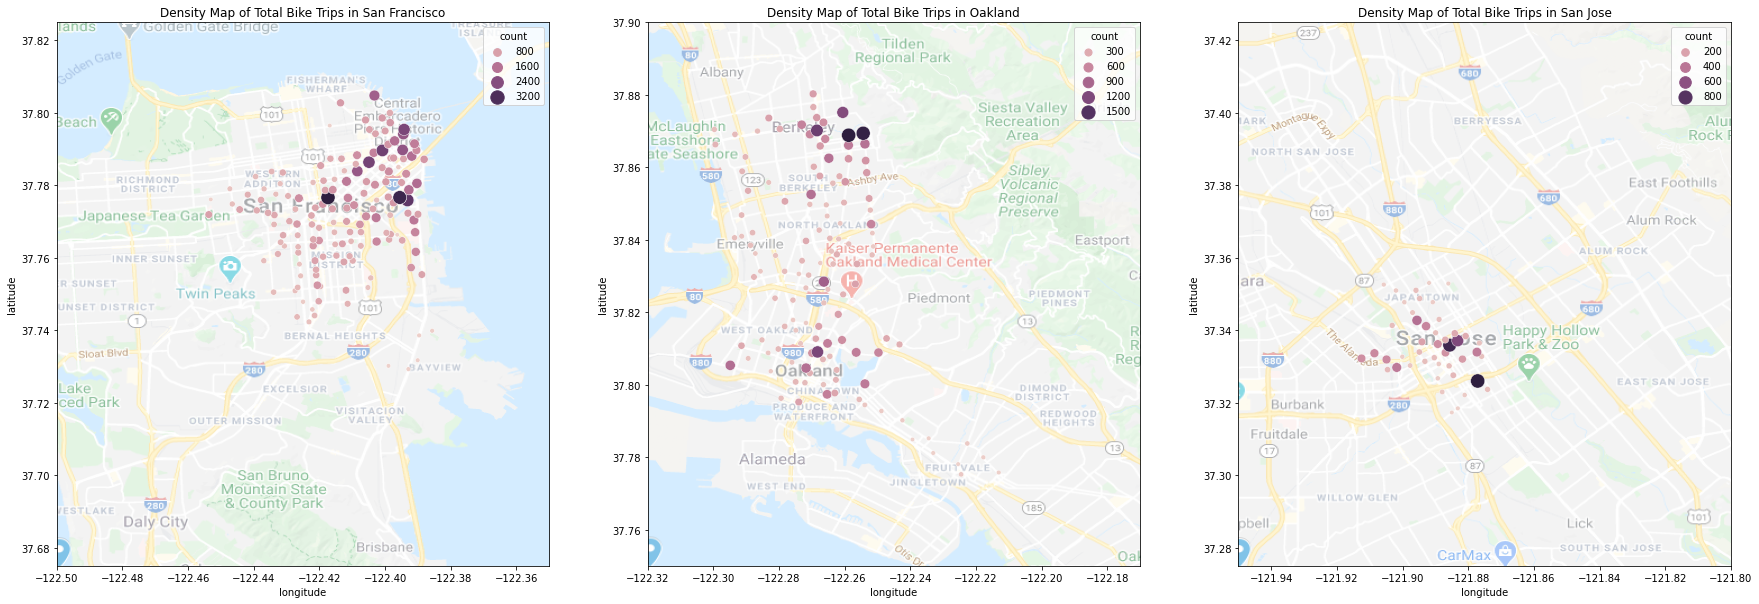

In [30]:
# Find geographical locations and plotting overlay on google maps
sf_img = mpimg.imread('sf_png.PNG')
oak_img = mpimg.imread('oak_png.PNG')
sj_img = mpimg.imread('sj_png.PNG')

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

sb.scatterplot(ax=axes[0], data = df_sf_plt, x='longitude', y='latitude', hue='count', size='count', sizes=(20,200));
axes[0].imshow(sf_img, extent=[-122.5, -122.35, 37.675, 37.825], alpha=0.5, aspect='auto')
axes[0].set_title('Density Map of Total Bike Trips in San Francisco')

sb.scatterplot(ax=axes[1], data = df_oak_plt, x='longitude', y='latitude', hue='count', size='count', sizes=(20,200));
axes[1].imshow(oak_img, extent=[-122.32, -122.17, 37.75, 37.9], alpha=0.5, aspect='auto')
axes[1].set_title('Density Map of Total Bike Trips in Oakland')

sb.scatterplot(ax=axes[2], data = df_sj_plt, x='longitude', y='latitude', hue='count', size='count', sizes=(20,200));
axes[2].imshow(sj_img, extent=[-121.95, -121.8, 37.275, 37.425], alpha=0.5, aspect='auto')
axes[2].set_title('Density Map of Total Bike Trips in San Jose')

plt.show()